In [1]:
# This notebook mimics Tensorflow Playground at
# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=15&networkShape=8,8,8,8&seed=0.17707&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# With Keras Sequential Model

# import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

2025-07-29 22:41:31.678795: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 22:41:31.682336: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 22:41:31.697573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753828891.722989    6735 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753828891.730065    6735 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753828891.744154    6735 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# 1. Generate spiral dataset (similar to playground)
def create_spiral_data(n_samples=500, noise=0.1):
    """Create spiral dataset with two classes"""
    n = np.sqrt(np.random.rand(n_samples, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_samples, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_samples, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_samples), np.ones(n_samples))))

# Generate data
X, y = create_spiral_data(noise=0.15)

In [4]:
# 2. Build the 4-layer neural network (matching playground)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)),  # Layer 1
    tf.keras.layers.Dense(8, activation='relu'),                   # Layer 2
    tf.keras.layers.Dense(8, activation='relu'),                   # Layer 3
    tf.keras.layers.Dense(8, activation='relu'),                   # Layer 4
    tf.keras.layers.Dense(1, activation='sigmoid')                 # Output
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# 3. Train the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0)

     1/199710 ━━━━━━━━━━━━━━━━━━━━ 8:34:52 155ms/step

2025-07-29 22:42:01.265419: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51125712 exceeds 10% of free system memory.
2025-07-29 22:42:01.338526: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51125712 exceeds 10% of free system memory.
2025-07-29 22:42:01.378151: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51125712 exceeds 10% of free system memory.
2025-07-29 22:42:01.434734: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51125712 exceeds 10% of free system memory.


199710/199710 ━━━━━━━━━━━━━━━━━━━━ 143s 714us/step


2025-07-29 22:44:23.976562: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51125712 exceeds 10% of free system memory.


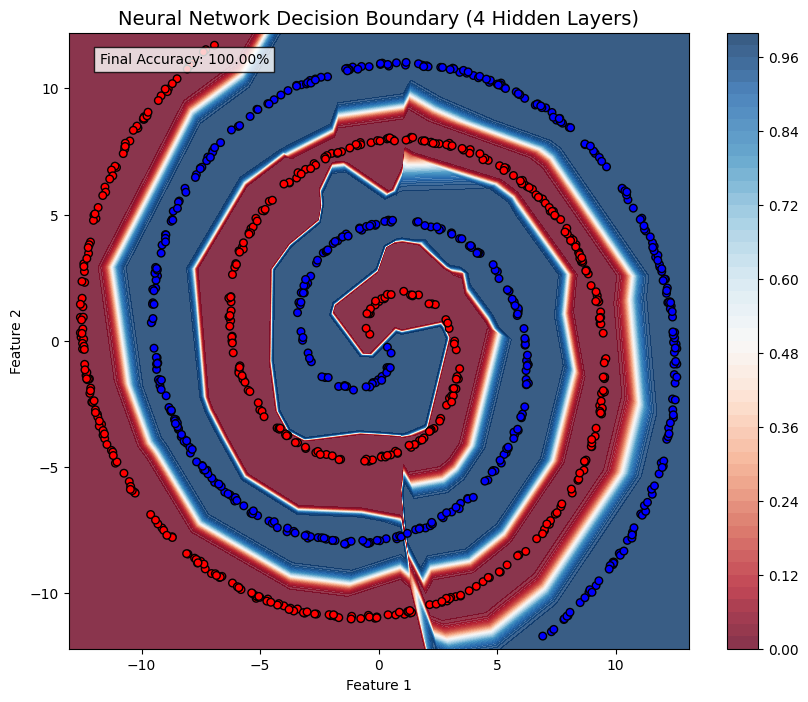

In [6]:
# 4. Create visualization function
def plot_decision_boundary(model, X, y):
    """Plot decision boundary similar to TF Playground"""
    # Create grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict probabilities
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.8)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
                edgecolors='k', s=30)
    plt.title("Neural Network Decision Boundary (4 Hidden Layers)", fontsize=14)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Add accuracy text
    acc = history.history['accuracy'][-1]
    plt.text(0.05, 0.95, f"Final Accuracy: {acc:.2%}",
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

# 5. Visualize results
plot_decision_boundary(model, X, y)
plt.show()